# Analysis of the conspiracies related to the Coronavirus on Reddit, such as the 5G, chloroquine

In [1]:
import importlib
import covidStream

from psaw import PushshiftAPI
import oauth, tweepy, praw
from youtube_api import YouTubeDataAPI

from wordcloud import WordCloud, STOPWORDS 
import json
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import datetime as dt
import time, functools, operator
from collections import Counter

from bs4 import BeautifulSoup
from requests import get

import networkx as nx

### Twitter, Youtube and Reddit API Setup

In [2]:
with open("Credentials/redditCredentials.json", "r") as redditFile:
    redditCredentials = json.load(redditFile)

In [3]:
reddit = praw.Reddit(client_id=redditCredentials['client_id'], \
                     client_secret=redditCredentials['client_secret'], \
                     user_agent='test', \
                     username=redditCredentials['username'], \
                     password=redditCredentials['password'])

psawAPI = PushshiftAPI(reddit)

In [4]:
with open("Credentials/twitterCredentials.json", "r") as twitterFile:
    twitterCredentials = json.load(twitterFile)

In [5]:
auth = tweepy.OAuthHandler(twitterCredentials['consumer_key'], twitterCredentials['consumer_secret'])
auth.set_access_token(twitterCredentials['access_key'], twitterCredentials['access_secret'])
twitterAPI = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
with open("Credentials/youtubeCredentials.json", "r") as youtubeFile:
    youtubeCredentials = json.load(youtubeFile)

In [7]:
youtubeAPI = YouTubeDataAPI(youtubeCredentials['api_key'])

### Time analysis of the mentions of chloroquine and 5G

Timeline analysis
Subreddit analysis


/mnt/ntfs/Amin Mekacher/reddit-conspiracy-analysis/covidStream.py:914: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  subredditDF = pd.concat([subredditDF, datesDF], axis=1)
/home/aminmekacher/.local/lib/python3.7/site-packages/bokeh/models/plots.py:764: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


Timeline analysis
Subreddit analysis


/mnt/ntfs/Amin Mekacher/reddit-conspiracy-analysis/covidStream.py:914: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  subredditDF = pd.concat([subredditDF, datesDF], axis=1)
/home/aminmekacher/.local/lib/python3.7/site-packages/bokeh/models/plots.py:764: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


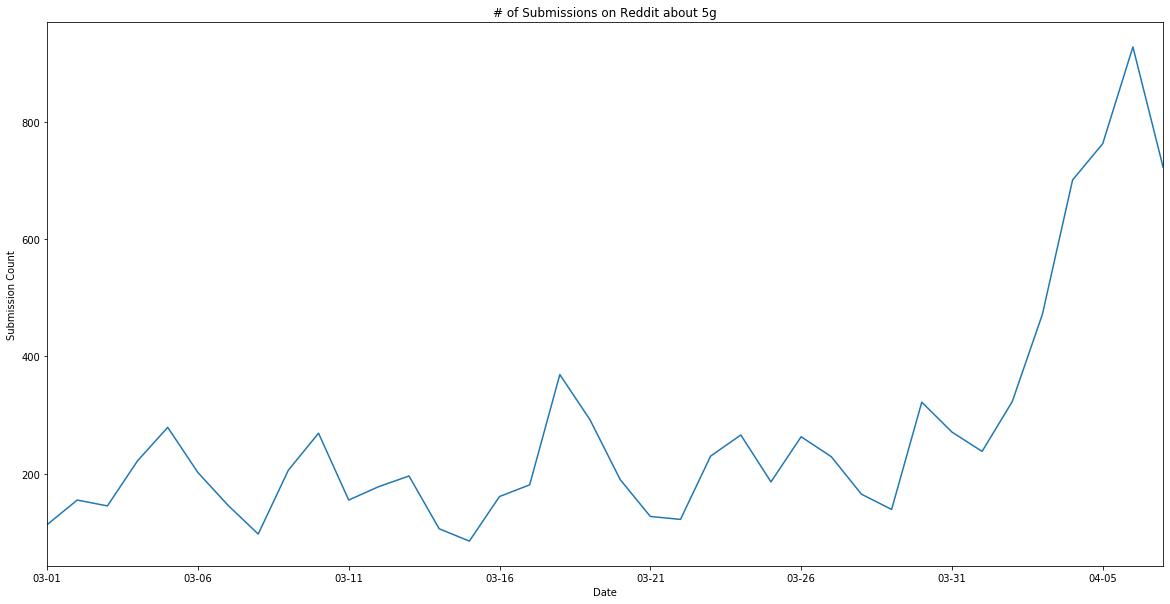

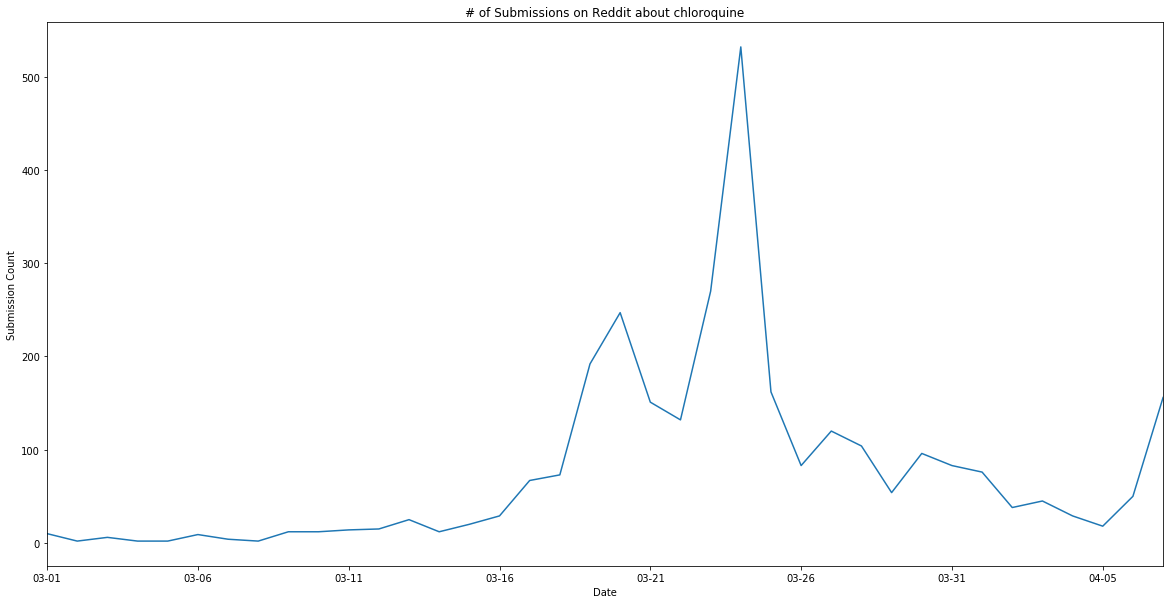

In [8]:
importlib.reload(covidStream)
subredditActivityList = ['China_Flu', 'Coronavirus', 'conspiracy', 'worldnews', 'The_Donald', 'technology', 'LouderWithCrowder', 'libtard', 'TheNewsFeed']
topicDF, conspiracyGraph, commonRedditorTotal = covidStream.conspiratorial_topics_analysis(psawAPI, topicsList=['5g', 'chloroquine'], subredditActivityList=subredditActivityList)

### Community Analysis

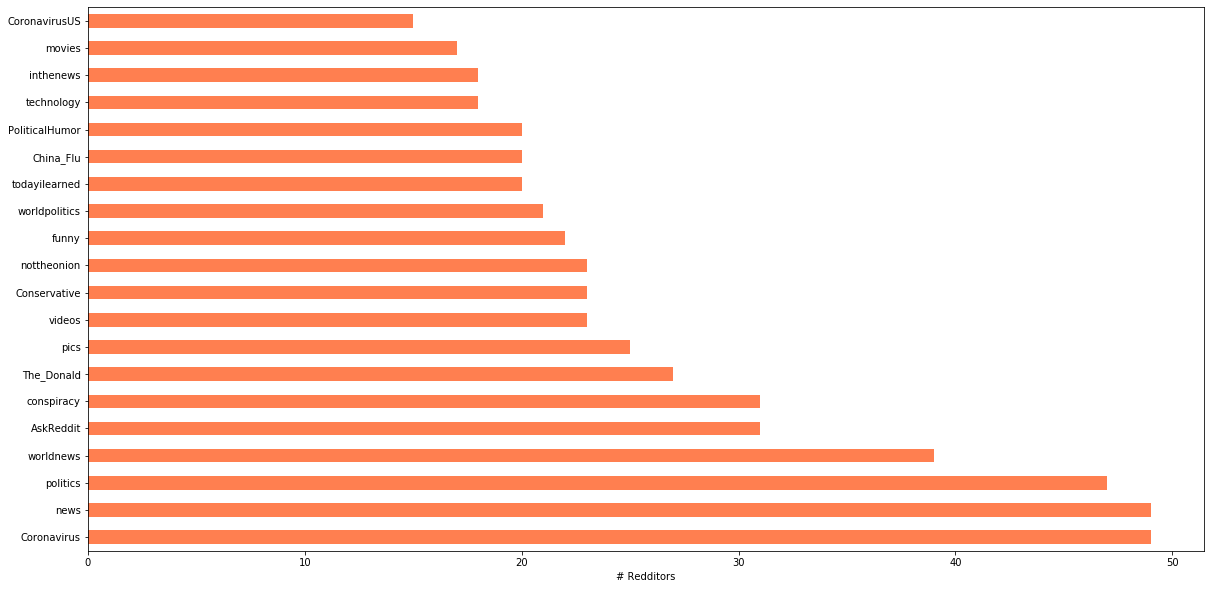

In [31]:
importlib.reload(covidStream)
covidStream.redditor_conspiracy_analysis(list(set(commonRedditorTotal)), psawAPI)